# Rock-Paper-Scissor dataset Model 

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    #Import ImageDataGenerator to generate for Data-Augmentation.
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#load the data :

training_data_address = r"D:\Computer Science\Machine Learning\Dacuments\My Datasets\Rock Paper Scissor\rps-training-set\rps"
test_data_address = r"D:\Computer Science\Machine Learning\Dacuments\My Datasets\Rock Paper Scissor\rps-test-set\rps-test-set"

#Data Augmentation Step to get more data to train :

training_datagen = ImageDataGenerator(rescale = 1./255,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                      rotation_range = 40,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     fill_mode = 'nearest',
                                     height_shift_range = 0.2,
                                     width_shift_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

#

training_data = training_datagen.flow_from_directory(training_data_address,
                                                 target_size = (150,150),
                                                  batch_size = 126,
                                                    class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_data_address,
                                                 target_size = (150,150),
                                                  batch_size = 126,
                                                    class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [3]:
model = Sequential([
   
    Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
    MaxPool2D(2,2),
    
    Conv2D(64 , (3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    
    Conv2D(128 , (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    
    Conv2D(128 , (3,3), activation = 'relu'),
    MaxPool2D(2,2),
    
    Flatten(),
    
    Dropout(0.5),     #Dropout of '0.5' to turn the '50%' of neurons off to reduce variance.
    
    Dense(512 , activation = 'relu'),
    Dense(3 , activation = 'softmax')
    
])

class Callback(tf.keras.callbacks.Callback):    # A callback class to cancel the training when it reaches 98% of accuracy.
    def end_of_epoch(self , epochs, logs={}):
        print("Maximum accuracy reached ! So cancelling the training.")
        if(logs.get["accuracy"]>0.98):
            self.model.stop_training = True

#Compile the model :
model.compile(loss = "categorical_crossentropy" , optimizer = 'rmsprop' , metrics = ["accuracy"])    

callbacks = Callback()

#Fit the model :
history = model.fit(training_data, epochs = 25, steps_per_epoch = 20, validation_data = test_data, verbose = 1, validation_steps = 3, callbacks = [callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25
20/20 [==============================] - 193s 10s/step - loss: 1.6641 - accuracy: 0.3381 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 179s 9s/step - loss: 1.1006 - accuracy: 0.3794 - val_loss: 1.1202 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 178s 9s/step - loss: 1.0830 - accuracy: 0.4056 - val_loss: 1.0666 - val_accuracy: 0.6237
Epoch 4/25
20/20 [==============================] - 176s 9s/step - loss: 1.1336 - accuracy: 0.4024 - val_loss: 1.0834 - val_accuracy: 0.3333
Epoch 5/25
20/20 [==============================] - 176s 9s/step - loss: 1.0493 - accuracy: 0.4405 - val_loss: 0.9442 - val_accuracy: 0.6667
Epoch 6/25
20/20 [==============================] - 176s 9s/step - loss: 1.0911 - accuracy: 0.4583 - val_loss: 0.9993 - val_accuracy: 0.6344
Epoch 7/25
20/20 [==============================] - 176s 9s/st

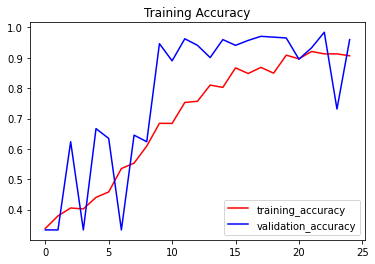

<Figure size 432x288 with 0 Axes>

In [4]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training_accuracy')
plt.plot(epochs , val_acc , 'b' , label = 'validation_accuracy')
plt.title("Training Accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()